In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2970 sha256=be0213ed8fbb3253924b00edfae83932517b55daff4829f23e6cb256299f2fba
  Stored in directory: c:\users\sumuk\appdata\local\pip\cache\wheels\5c\47\e1\386fa7740f1947ad87d16c68041c16ad8c23ca2bfd139a3fe5
Successfully built sklearn
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\sumuk\AppData\Local\Temp\pip-install-gp8k0lma\tensorflow-gpu_b815772c58b84e068c9de57b7d9105b1\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [2]:
!pip install tensorflow 

In [3]:
!pip install sklearn


In [4]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [6]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [12]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [14]:
from tensorflow.keras.layers import TextVectorization


In [15]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [16]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [18]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [19]:
MAX_FEATURES = 200000

In [20]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [21]:
vectorizer.adapt(X.values)

In [23]:
vectorized_text = vectorizer(X.values)

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [25]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [29]:
len(test)

997

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [31]:
model = Sequential()

In [32]:
model.add(Embedding(MAX_FEATURES+1, 32))

In [33]:
model.add(Bidirectional(LSTM(32, activation='tanh')))

In [34]:
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [35]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [37]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 14824s 2s/step - loss: 0.0663 - val_loss: 0.0478


In [38]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

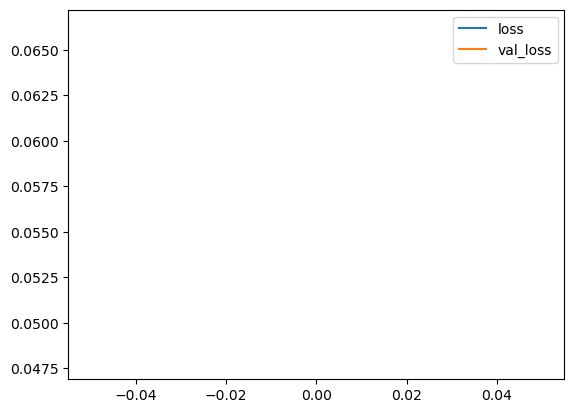

In [39]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [40]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [43]:
 model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 7s 7s/step


array([[0.982608  , 0.15346088, 0.7706181 , 0.03965814, 0.728176  ,
        0.13360807]], dtype=float32)

In [53]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 2s 2s/step


In [44]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [45]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [46]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 6s 6s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [47]:
res.shape

(1, 6)

In [48]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [54]:
for batch in test.as_numpy_iterator(): 
     X_true, y_true = batch
     yhat = model.predict(X_true)
     y_true = y_true.flatten()
     yhat = yhat.flatten()
     pre.update_state(y_true, yhat)
     re.update_state(y_true, yhat)
     acc.update_state(y_true, yhat)

1/1 [==============================] - 2s 2s/step


In [55]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7931677103042603, Recall:0.69819575548172, Accuracy:0.489130437374115


In [56]:
!pip install gradio jinja2

     ---------------------------------------- 20.0/20.0 MB 3.1 MB/s eta 0:00:00
  Using cached httpx-0.24.1-py3-none-any.whl (75 kB)
  Using cached websockets-11.0.3-cp310-cp310-win_amd64.whl (124 kB)
  Using cached huggingface_hub-0.15.1-py3-none-any.whl (236 kB)
     -------------------------------------- 288.3/288.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB 2.9 MB/s eta 0:00:00
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
  Using cached python_multipart-0.0.6-py3-none-any.whl (45 kB)
  Using cached mdit_py_plugins-0.3.3-py3-none-any.whl (50 kB)
  Using cached aiofiles-23.1.0-py3-none-any.whl (14 kB)
     ------------------------------------ 191.7/191.7 kB 331.8 kB/s eta 0:00:00
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached Pygments-2.15.1-py3-none-any.whl (1.1 MB)
  Using cached altair-5.0.1-py3-none-any.whl (471 kB)
     ---------------------------------------- 87.5/87.5 kB 1.6 MB/s eta 0:00:0

In [57]:
import tensorflow as tf
import gradio as gr

In [58]:
model.save('Sentiment.h5')

In [60]:
model = tf.keras.models.load_model('Sentiment.h5')

In [61]:
input_str = vectorizer('hey i freaken hate you!')

In [62]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 7s 7s/step


In [63]:

res

array([[0.8325116 , 0.03330403, 0.34694767, 0.03061979, 0.4306432 ,
        0.08075248]], dtype=float32)

In [64]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [65]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\sumuk\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\sumuk\anaconda3\lib\site-packages\gradio\inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\sumuk\anaconda3\lib\site-packages\gradio\inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


In [66]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app. 

Also please ensure that your antivirus or firewall is not blocking the binary file located at: C:\Users\sumuk\anaconda3\lib\site-packages\gradio\frpc_windows_amd64_v0.2


1/1 [==============================] - 42s 42s/step
